In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
titanic_df = pd.read_excel("Titanic_Passengers_Dataset.xlsx")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley\n(Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.\n3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath\n(Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Description

   survival: Survival (0 = No; 1 = Yes)
   
   pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
   
   name: Name
   
   sex: Sex
   
   age: Age
   
   sibsp: Number of Siblings/Spouses Aboard
   
   parch: Number of Parents/Children Aboard
   
   ticket: Ticket Number
   
   fare: Passenger Fare
   
   cabin: Cabin
   
   embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## Variable Identification

Dependent variable: survival(0=NO, 1 =YES)

Independentt Variable : pclass , name, sex , age , sibsp , parch , ticket , fare , cabin , embarked 

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df.info()
#Count for ‘Age’ column is 714, it means dataset has some missing values.
#There are missing values in ‘Age’, ‘Cabin’ and ‘Embarked’ columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_cleaned = titanic_df.drop(['PassengerId','Name','Ticket','Cabin'] , axis = 1)
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Exploratory Data Analysis

1. How Survival is correlated to other attributes of dataset?

2. Did Sex of the survivor play a role in survival?

3. Did class played role in survival?

4. How fare is related to age , class and port of Embarkment? 

5. How Embarkation varied across different ports ?

# Univariate Analysis

In [9]:
#1. How Survival is correlated to other attributes of dataset?
titanic_cleaned.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


From above correlation table we can see that Survival is inversly correlated to Pclass value. In our case since Class 1 has lower numerical value, it had better survival rate compared to other classes.

We also see that Age and Survival are slighltly correlated.

Text(0.5, 1.0, 'Count of Passengers who survived')

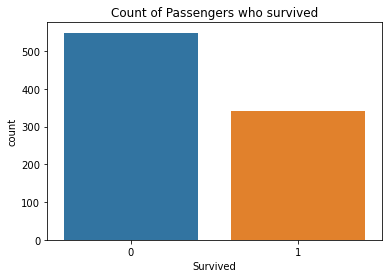

In [10]:
# 2. Did Sex of the survivor play a role in survival?

sns.countplot(x='Survived',data = titanic_df)
plt.title('Count of Passengers who survived')

Text(0.5, 1.0, 'Agewise distribution of the passenger aboard the Titanic')

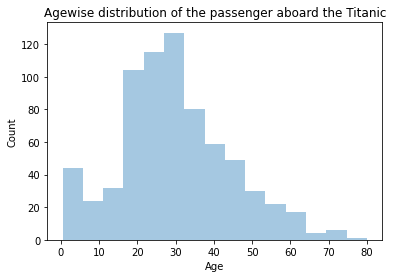

In [11]:
#Lets see the agewise distribution of the passenger aboard the titanic.
sns.distplot(titanic_cleaned['Age'].dropna(),bins = 15 , kde = False)
plt.ylabel('Count')
plt.title('Agewise distribution of the passenger aboard the Titanic')

#Many passensgers are of age 15-40 yrs.

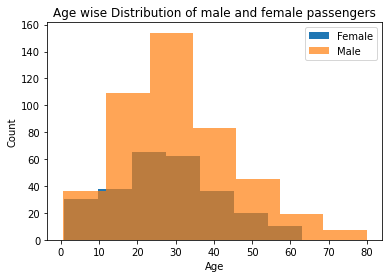

In [12]:
#Age wise Distribution of Male and Female passengers
#plotting the rows where ‘Sex’ is Male and Female respectively.

plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'male')].dropna(), bins=7, label='Male',alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of male and female passengers')
plt.legend()

#There were many male passengers aboared compared to female passengers.

 Now we will  Agewise distribtuion of Male and Female Survivors who survived by filtering out rows where 'Survived'=1

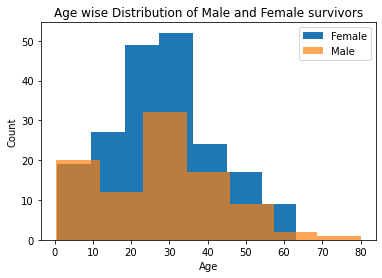

In [13]:
#Age wise Distribution of Male and Female survivors

plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'female') & (titanic_cleaned['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'male') & (titanic_cleaned['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()


From above visualization, it is evident that Women had better survival chance.

In [14]:
#Lets take a look for youngest and oldest passenger to survive.

yougest_survive = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 1)].min()
youngest_die = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 0)].min()
oldest_survive = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 1)].max()
oldest_die = titanic_cleaned['Age'][(titanic_cleaned['Survived'] == 0)].max()

print("Yougest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}".format(yougest_survive, youngest_die, oldest_survive, oldest_die))


Yougest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


In [15]:
# 3. Did class played role in survival?
#let’s look at survival based on passenger’s class for both genders.
#grouping the dataframe with respect to Pclass, Survived and Sex.

grouped_by_pclass = titanic_cleaned.groupby(['Pclass','Survived','Sex'])
grouped_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [16]:
titanic_cleaned.groupby(['Pclass', 'Sex']).describe()

Survived                                                 Age  \
                 count      mean       std  min  25%  50%  75%  max  count   
Pclass Sex                                                                   
1      female     94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0   85.0   
       male      122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  101.0   
2      female     76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0   74.0   
       male      108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0   99.0   
3      female    144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  102.0   
       male      347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0  253.0   

                          ... Parch        Fare                         \
                    mean  ...   75%  max  count        mean        std   
Pclass Sex                ...                                            
1      female  34.611765  ...   1.0  2.0   94.0  106.125798  74.259988   
       male    41.281386  ...   0.0  4.0  122.0   67.226127  77.548021   
2      female  28.722973  ...   1.0  3.0   76.0   21.970121  10.891796   
       male    30.740707  ...   0.0  2.0  108.0   19.741782  14.922235   
3      female  21.750000  ...   1.0  6.0  144.0   16.118810  11.690314   
       male    26.507589  ...   0.0  5.0  347.0   12.661633  11.681696   

                                                                  
                   min       25%       50%         75%       max  
Pclass Sex                                                        
1      female  25.9292  57.24480  82.66455  134.500000  512.3292  
       male     0.0000  27.72810  41.26250   78.459375  512.3292  
2      female  10.5000  13.00000  22.00000   26.062500   65.0000  
       male     0.0000  12.33125  13.00000   26.000000   73.5000  
3      female   6.7500   7.85420  12.47500   20.221875   69.5500  
       male     0.0000   7.75000   7.92500   10.008300   69.5500  

[6 rows x 40 columns]

To see the survival rate across all the class. we can do this by taking sum of survived passengers for each class and divide it by totla number of passenger for that class and multiplying by 100. I will use pandas groupby function to segregate passengers according to their class.

In [17]:
titanic_cleaned.groupby(['Pclass'])['Survived'].sum()/titanic_cleaned.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Text(0.5, 0.98, 'Class wise segregation of passengers')

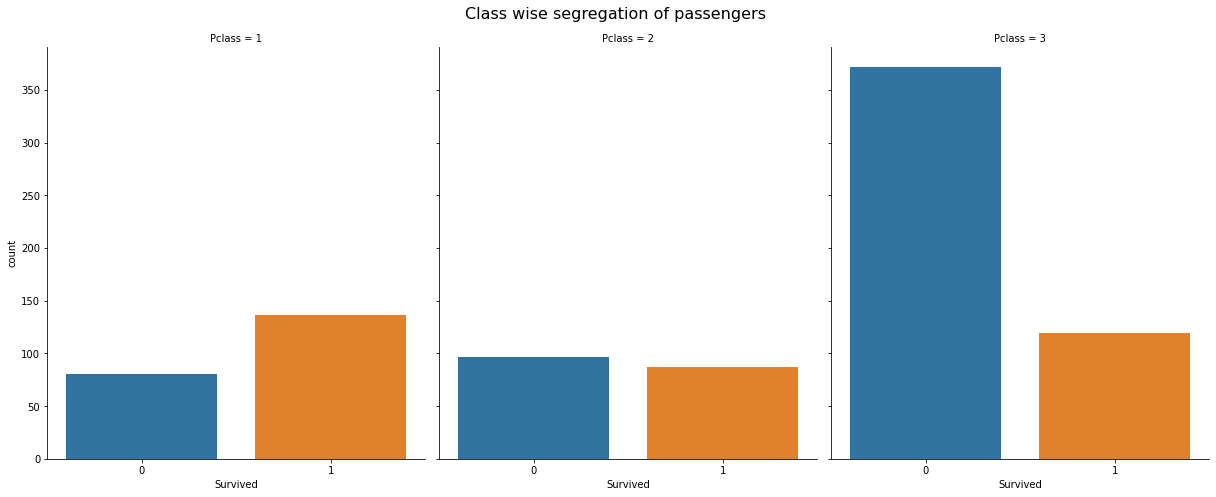

In [19]:
# see Class did play role in survival of the passengers. Now let’s visualize the same.
sns.factorplot('Survived', col='Pclass', data=titanic_cleaned, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=16)

From above visualization we can see that class played important for Survival of Male and Female passengers. This brings us to my next questions

### Q4. How fare is related to Age, Class and Port of Embarkation ?

### Q5. How Embarkation varied across different ports ?

Let’s see how Fare varies with respect to Age and Port of Embarkation. I will do a scatterplot of passengers from 3 classes for Age and Fare on X and Y axis.

Text(0.5, 1.0, 'Scatterplot of passengers w.r.t Fare and Age')

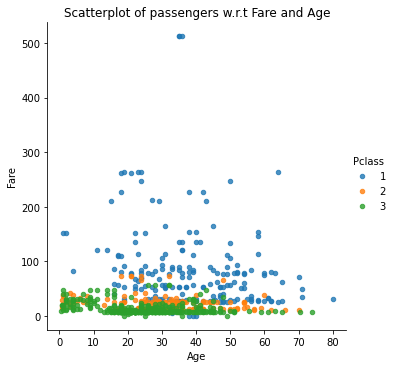

In [20]:
sns.lmplot('Age','Fare',data=titanic_cleaned, fit_reg=False,hue="Pclass",scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of passengers w.r.t Fare and Age')

I can segregate the passengers according to thier Port of Embarkation and then compare Fare v/s Age across 3 classes.

Text(0.5, 0.98, 'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

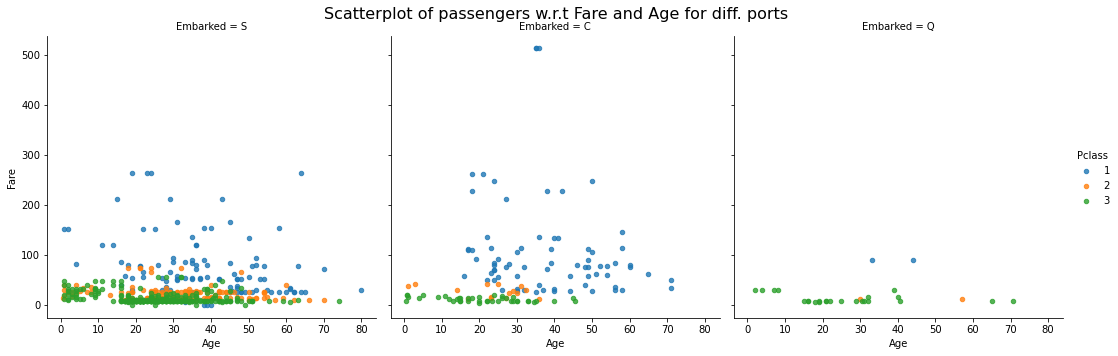

In [22]:
sns.lmplot('Age', 'Fare', data=titanic_cleaned, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

From above visualization we can see that Fare is quite uniform for Class 2 and 3 across all ages. Fare varies for Class 1 across all ages, but we cannot conclude why it varies. We need more attributes to our data points to drill down to the reason for variation. We can also observe that lot of passengers embarked from port of Southampton.

## Conclusions

From my exploratory analysis of Titanic dataset we conclude that, women had higher chances of survival. We can do a t test to come up with chances(probability) of survival. I also see that Class(Socio-Economic status) of the passengers had played a role in their survival. I also compared fare across different classes and found that it varied a lot for Class 1 passenger, although I could not conclude as to why it varried diffrently for Class 1 due to insufficient data.